# Transformada Z

x[n]: 
 n
a 

 Transformada z desde sumatoria:
⎛   1     │a│    ⎞
⎜───────, │─│ < 1⎟
⎜  a      │z│    ⎟
⎜- ─ + 1         ⎟
⎝  z             ⎠

 Transformada z simplificada
  z   
──────
-a + z

 ROC: 
│a│    
│─│ < 1
│z│    

 {polos:veces}:  {a: 1}


Text(0.5, 1.0, 'ROC X[z]=z/(-a + z) ; a=0.5')

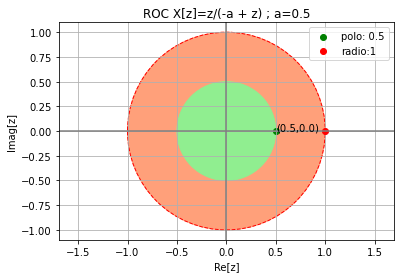

In [5]:
# transformada z de x[n]u[n]
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# INGRESO
z = sym.symbols('z')
n = sym.symbols('n',positive=True)
a = sym.symbols('a')

u = sym.Heaviside(n)
xn = (a**n)*u

# ROC Region de convergencia
a1 = 0.5  # valor a
m  = 7    # Términos a graficar
muestras = 101 # dominio z

# PROCEDIMIENTO
fnz = xn*(z**(-n))
# sumatoria en intervalo
Fz_n = sym.summation(fnz,(n,0,sym.oo))
Fz = Fz_n.args[0]     # primer intervalo
Xz = Fz[0].simplify() # expresion buscada

ROC = Fz[1]

# polos
[P,Q] = Xz.as_numer_denom()
Q = Q.as_poly(z)
Q_raiz = sym.roots(Q)

# SALIDA
print('x[n]: ')
sym.pprint(xn)
print('\n Transformada z desde sumatoria:')
sym.pprint(Fz)
print('\n Transformada z simplificada')
sym.pprint(Xz)
print('\n ROC: ')
sym.pprint(ROC)
print('\n {polos:veces}: ',Q_raiz)

# GRAFICA valores
Qa = Q.subs(a,a1) # sustituye a con a1
Qa = Qa.as_poly(z)
Qa_raiz = sym.roots(Qa)
# para graficar x[n]
fn = sym.lambdify([n,a],xn)
ki = np.arange(0,m,1)
xnk = fn(ki,a1)

# estima intervalo para z
z_limite = np.abs(list(Qa_raiz.keys()))
z_limite = np.concatenate((z_limite,[1])
                          ,axis=0)
z_limite = 2*int(np.max([z_limite]))

# X[z]
zi  = np.linspace(-z_limite,z_limite,
                  muestras)
fz = sym.lambdify([z,a],Xz)
Xzi = fz(np.abs(zi),a1) # usa |z|
# Revisar cuando z es complejo

# grafica plano z imaginario
figura, grafROC = plt.subplots()
# limite
radio1 = plt.Circle((0,0),1,
                    color='lightsalmon',
                    fill=True)
radio2 = plt.Circle((0,0),1,
                    linestyle='dashed',
                    color='red',fill=False)
grafROC.add_patch(radio1)
for raiz in Qa_raiz.keys():
    [r_real,r_imag] = raiz.as_real_imag()
    radio_raiz = np.abs(raiz)
    nROC = plt.Circle((0,0),radio_raiz,
                      color='lightgreen',
                      fill=True)
    grafROC.add_patch(nROC)
grafROC.add_patch(radio2) # borde r=1
grafROC.axis('equal')
# marcas de r=1 y valor a
for raiz in Qa_raiz.keys():
    x_polo = sym.re(raiz)
    y_polo = sym.im(raiz)
    etiqueta = 'polo: '+str(float(np.abs(raiz)))
    grafROC.scatter(x_polo,y_polo,marker='o',
                    color='green',label = etiqueta)
    etiqueta = "("+str(float(x_polo)) + ','
    etiqueta = etiqueta + str(float(y_polo))+")"
    plt.annotate(etiqueta,(x_polo,y_polo))
grafROC.plot(1,0,'o',color='red',
             label ='radio:'+str(1))

plt.axhline(0,color='grey')
plt.axvline(0,color='grey')
plt.grid()
plt.legend()
plt.xlabel('Re[z]')
plt.ylabel('Imag[z]')
untitulo = 'ROC X[z]='+str(Xz)
untitulo = untitulo+ ' ; a='+str(a1)
plt.title(untitulo)





Text(0.5, 1.0, 'x[n]= a**n ; a=0.5')

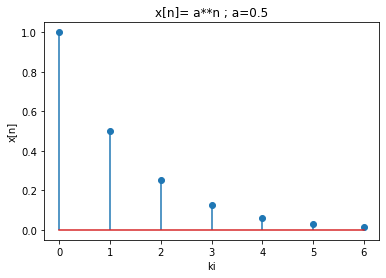

In [6]:

# entrada x[n]
figura, grafxn = plt.subplots()
plt.stem(ki,xnk)

plt.xlabel('ki')
plt.ylabel('x[n]')
plt.title('x[n]= '+str(xn)+' ; a='+str(a1))


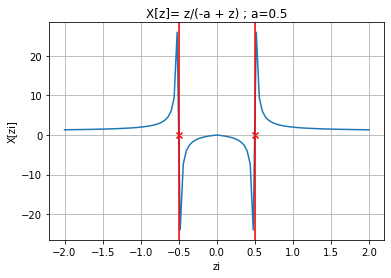

In [7]:

# dominio z
figura, grafXz = plt.subplots()
plt.plot(zi,Xzi,label='X[z]')
for raiz in Qa_raiz.keys():
    x_polo = sym.re(raiz)
    y_polo = sym.im(raiz)
    radio_raiz = np.abs(raiz)
    plt.axvline(radio_raiz,color='red')
    plt.axvline(-radio_raiz,color='red')
    plt.scatter(x_polo,y_polo,
                label='polo:'+str(radio_raiz),
                marker='x',color='red')
    plt.scatter(-x_polo,y_polo,
                label='polo:'+str(radio_raiz),
                marker='x',color='red')
plt.grid()
untitulo ='X[z]= '+str(Xz)
untitulo = untitulo+ ' ; a='+str(a1)
plt.title(untitulo)
plt.xlabel('zi')
plt.ylabel('X[zi]')

plt.show()